In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
nltk.download('stopwords')

from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.stem.porter import PorterStemmer

import string
import re
import textblob
from textblob import TextBlob
import os

from wordcloud import WordCloud, STOPWORDS
from wordcloud import ImageColorGenerator
import warnings
%matplotlib inline

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
#Read the JSON generated from the CLI command above and create a pandas dataframe
tweets_df = pd.read_csv(r'/content/drive/MyDrive/SMA Practical Exam/Find and visualize top N Bigrams /Tweets.csv')

In [ ]:
tweets_df.head(5)


,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)


In [ ]:
tweets_df.to_csv()


Output hidden; open in https://colab.research.google.com to view.

In [ ]:
tweets_df.shape


(14640, 15)

In [ ]:
tweets_df.head


<bound method NDFrame.head of                  tweet_id airline_sentiment  airline_sentiment_confidence  \
0      570306133677760513           neutral                        1.0000   
1      570301130888122368          positive                        0.3486   
2      570301083672813571           neutral                        0.6837   
3      570301031407624196          negative                        1.0000   
4      570300817074462722          negative                        1.0000   
...                   ...               ...                           ...   
14635  569587686496825344          positive                        0.3487   
14636  569587371693355008          negative                        1.0000   
14637  569587242672398336           neutral                        1.0000   
14638  569587188687634433          negative                        1.0000   
14639  569587140490866689           neutral                        0.6771   

               negativereason  negativereason_confidence         airline  \
0                         NaN                        NaN  Virgin America   
1                         NaN                     0.0000  Virgin America   
2                         NaN                        NaN  Virgin America   
3                  Bad Flight                     0.7033  Virgin America   
4                  Can't Tell                     1.0000  Virgin America   
...                       ...                        ...             ...   
14635                     NaN                     0.0000        American   
14636  Customer Service Issue                     1.0000        American   
14637                     NaN                        NaN        American   
14638  Customer Service Issue                     0.6659        American   
14639                     NaN                     0.0000        American   

      airline_sentiment_gold             name negativereason_gold  \
0                        NaN          cairdin                 NaN   
1                        NaN         jnardino                 NaN   
2                        NaN       yvonnalynn                 NaN   
3                        NaN         jnardino                 NaN   
4                        NaN         jnardino                 NaN   
...                      ...              ...                 ...   
14635                    NaN  KristenReenders                 NaN   
14636                    NaN         itsropes                 NaN   
14637                    NaN         sanyabun                 NaN   
14638                    NaN       SraJackson                 NaN   
14639                    NaN        daviddtwu                 NaN   

       retweet_count                                               text  \
0                  0                @VirginAmerica What @dhepburn said.   
1                  0  @VirginAmerica plus you've added commercials t...   
2                  0  @VirginAmerica I didn't today... Must mean I n...   
3                  0  @VirginAmerica it's really aggressive to blast...   
4                  0  @VirginAmerica and it's a really big bad thing...   
...              ...                                                ...   
14635              0  @AmericanAir thank you we got on a different f...   
14636              0  @AmericanAir leaving over 20 minutes Late Flig...   
14637              0  @AmericanAir Please bring American Airlines to...   
14638              0  @AmericanAir you have my money, you change my ...   
14639              0  @AmericanAir we have 8 ppl so we need 2 know h...   

      tweet_coord              tweet_created tweet_location  \
0             NaN  2015-02-24 11:35:52 -0800            NaN   
1             NaN  2015-02-24 11:15:59 -0800            NaN   
2             NaN  2015-02-24 11:15:48 -0800      Lets Play   
3             NaN  2015-02-24 11:15:36 -0800            NaN   
4             NaN  2015-02-24 11:14:45 -0800            NaN   
...           ...       

In [ ]:
tweets_df.info


<bound method DataFrame.info of                  tweet_id airline_sentiment  airline_sentiment_confidence  \
0      570306133677760513           neutral                        1.0000   
1      570301130888122368          positive                        0.3486   
2      570301083672813571           neutral                        0.6837   
3      570301031407624196          negative                        1.0000   
4      570300817074462722          negative                        1.0000   
...                   ...               ...                           ...   
14635  569587686496825344          positive                        0.3487   
14636  569587371693355008          negative                        1.0000   
14637  569587242672398336           neutral                        1.0000   
14638  569587188687634433          negative                        1.0000   
14639  569587140490866689           neutral                        0.6771   

               negativereason  negativereason_confidence         airline  \
0                         NaN                        NaN  Virgin America   
1                         NaN                     0.0000  Virgin America   
2                         NaN                        NaN  Virgin America   
3                  Bad Flight                     0.7033  Virgin America   
4                  Can't Tell                     1.0000  Virgin America   
...                       ...                        ...             ...   
14635                     NaN                     0.0000        American   
14636  Customer Service Issue                     1.0000        American   
14637                     NaN                        NaN        American   
14638  Customer Service Issue                     0.6659        American   
14639                     NaN                     0.0000        American   

      airline_sentiment_gold             name negativereason_gold  \
0                        NaN          cairdin                 NaN   
1                        NaN         jnardino                 NaN   
2                        NaN       yvonnalynn                 NaN   
3                        NaN         jnardino                 NaN   
4                        NaN         jnardino                 NaN   
...                      ...              ...                 ...   
14635                    NaN  KristenReenders                 NaN   
14636                    NaN         itsropes                 NaN   
14637                    NaN         sanyabun                 NaN   
14638                    NaN       SraJackson                 NaN   
14639                    NaN        daviddtwu                 NaN   

       retweet_count                                               text  \
0                  0                @VirginAmerica What @dhepburn said.   
1                  0  @VirginAmerica plus you've added commercials t...   
2                  0  @VirginAmerica I didn't today... Must mean I n...   
3                  0  @VirginAmerica it's really aggressive to blast...   
4                  0  @VirginAmerica and it's a really big bad thing...   
...              ...                                                ...   
14635              0  @AmericanAir thank you we got on a different f...   
14636              0  @AmericanAir leaving over 20 minutes Late Flig...   
14637              0  @AmericanAir Please bring American Airlines to...   
14638              0  @AmericanAir you have my money, you change my ...   
14639              0  @AmericanAir we have 8 ppl so we need 2 know h...   

      tweet_coord              tweet_created tweet_location  \
0             NaN  2015-02-24 11:35:52 -0800            NaN   
1             NaN  2015-02-24 11:15:59 -0800            NaN   
2             NaN  2015-02-24 11:15:48 -0800      Lets Play   
3             NaN  2015-02-24 11:15:36 -0800            NaN   
4             NaN  2015-02-24 11:14:45 -0800            NaN   
...           ...     

In [ ]:
tweets_df.value_counts()


tweet_id            airline_sentiment  airline_sentiment_confidence  negativereason    negativereason_confidence  airline     airline_sentiment_gold  name             negativereason_gold  retweet_count  text                                                                                                              tweet_coord                  tweet_created              tweet_location  user_timezone             
567778009013178368  negative           1.0000                        Cancelled Flight  1.0000                     United      negative                realmikesmith    Cancelled Flight     0              @united So what do you offer now that my flight was Cancelled Flighted and I'm stranded away from home and work?  [26.37852293, -81.78472152]  2015-02-17 12:10:00 -0800  Chicago         Eastern Time (US & Canada)    1
569887533267611648  negative           0.8563                        Late Flight       0.5938                     US Airways  negative                ConstanceSCHE

In [ ]:
from sklearn.feature_extraction. text import TfidfVectorizer, CountVectorizer

In [ ]:
from nltk. corpus import stopwords
stop = stopwords.words('english')
tweets_df['text'].apply(lambda x: [item for item in x if item not in stop])
tweets_df.shape

(14640, 15)

<Axes: title={'center': 'Top 8 bigrams'}, ylabel='ngram'>

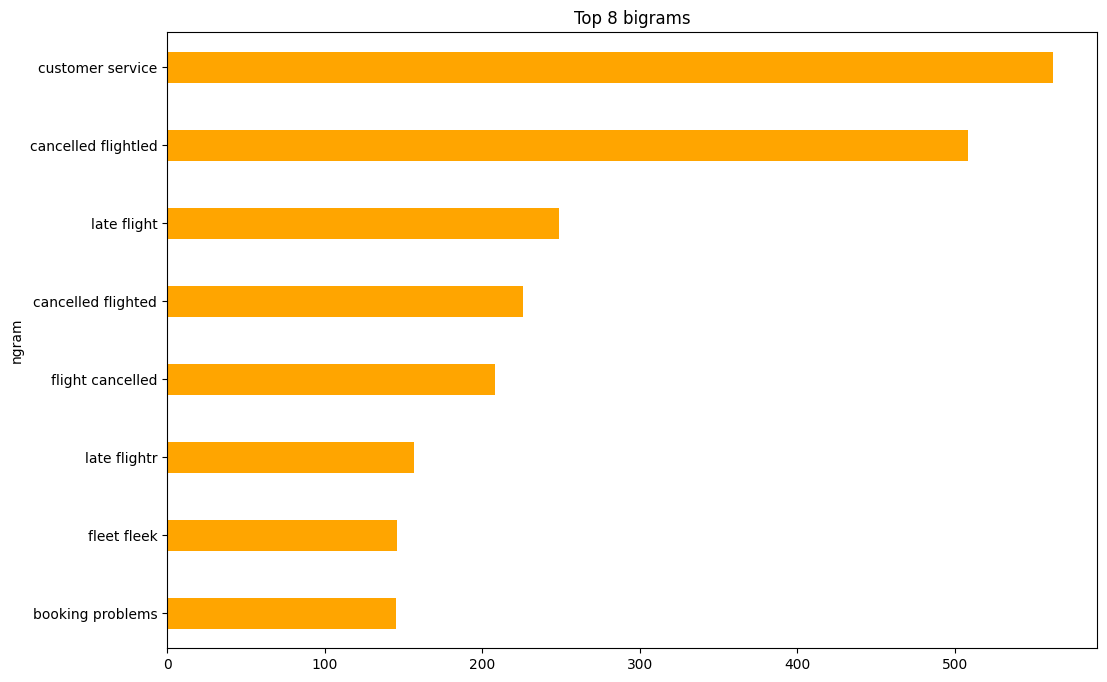

In [ ]:
import cufflinks as cf
cf.go_offline()
cf.set_config_file(offline=False, world_readable=True)

def get_top_n_bigram(corpus, n=None) :
  vec = CountVectorizer(ngram_range=(2, 4), stop_words="english").fit(corpus)
  bag_of_words = vec.transform(corpus)
  sum_words = bag_of_words.sum(axis=0)
  words_freq =[(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
  words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
  return words_freq[:n]

common_words = get_top_n_bigram(tweets_df['text'] , 8)
mydict={}
for word, freq in common_words:
  bigram_df = pd.DataFrame(common_words,columns = ['ngram', 'count'])

bigram_df.groupby( 'ngram' ).sum()['count'].sort_values(ascending=False).sort_values().plot.barh(title = 'Top 8 bigrams',color='orange' , width=.4, figsize=(12,8),stacked = True)